# ARIMA Example

An introduction to ARIMA forecasting with scalecast. The following topics are covered:  
1. Naive ARIMA Forecasting  
2. Using Exploratory Analysis to set ARIMA orders  
3. Using pmdarima to set ARIMA orders with an information criteria search  
4. Using scalecast to automatically set ARIMA orders with a grid search  
5. Plotting test-set predictions  
6. Plotting future forecasts  
7. Viewing ARIMA model summaries  

- data: https://www.kaggle.com/datasets/rakannimer/air-passengers
- blog post: https://towardsdatascience.com/forecast-with-arima-in-python-more-easily-with-scalecast-35125fc7dc2e

In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
df = pd.read_csv('AirPassengers.csv')
f = Forecaster(y=df['#Passengers'],current_dates=df['Month'])
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

## Naive Simple Approach

In [4]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

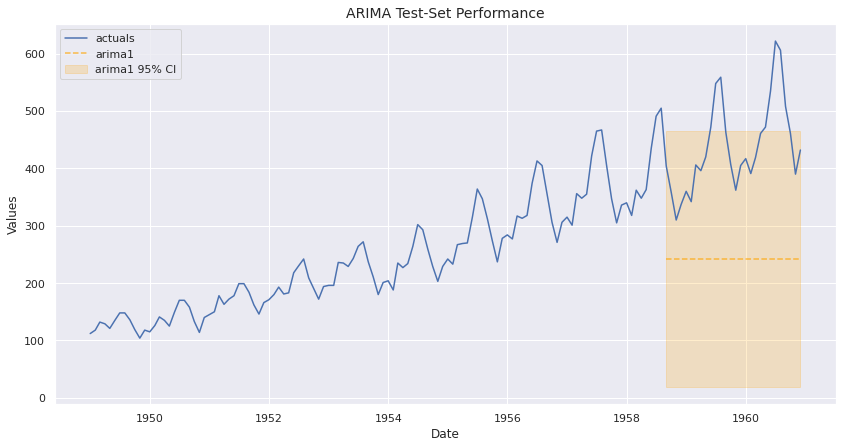

In [5]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

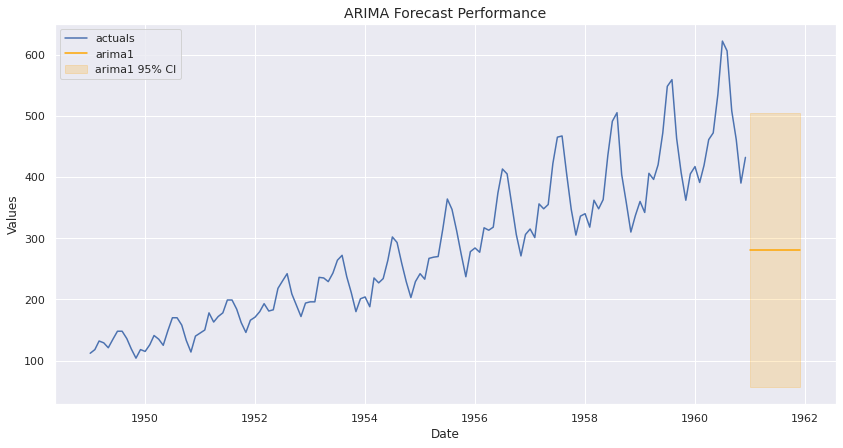

In [6]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

## Human Interpreation Iterative Approach

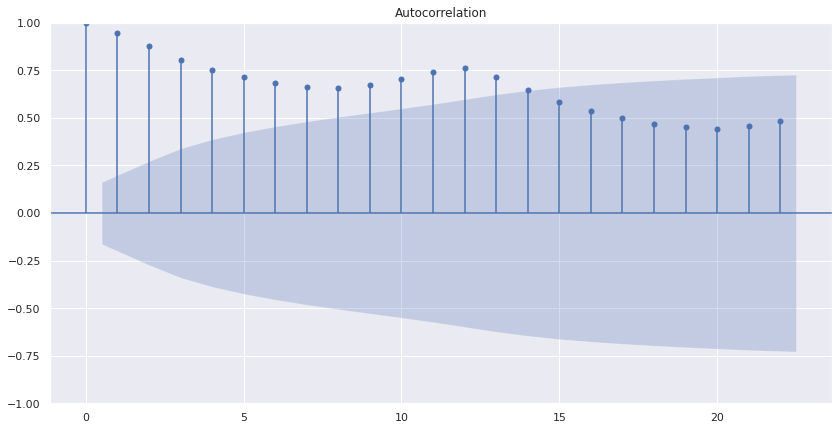

In [7]:
f.plot_acf()
plt.show()

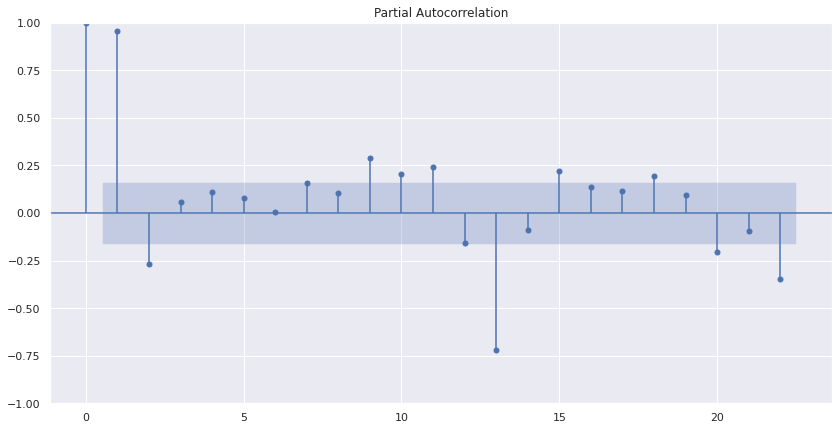

In [8]:
f.plot_pacf()
plt.show()

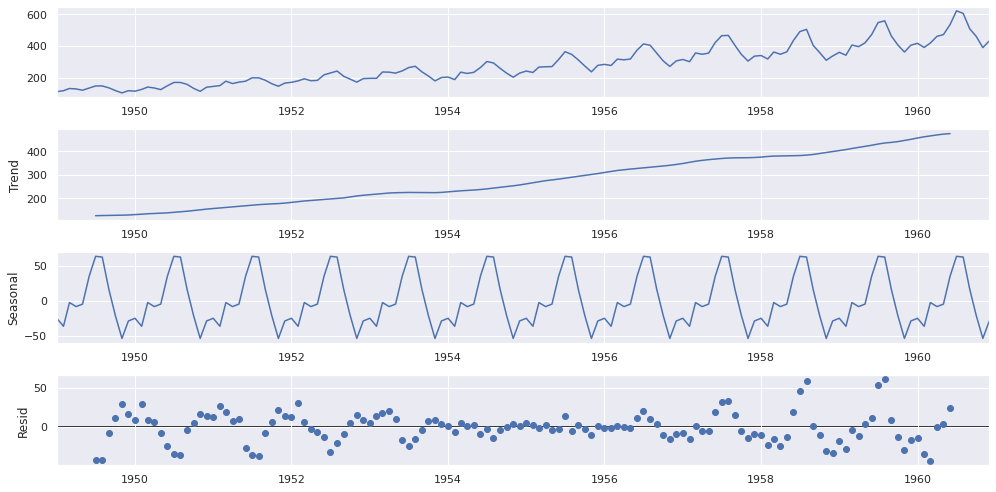

In [9]:
f.seasonal_decompose().plot()
plt.show()

In [10]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060472
0.991880243437641


In [11]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

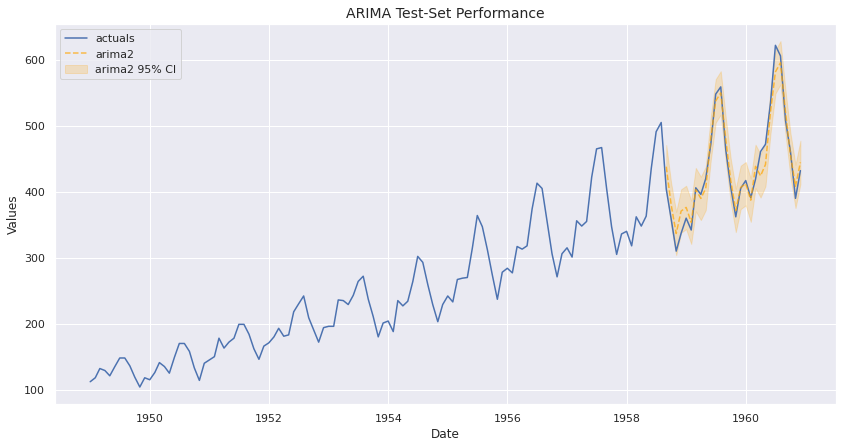

In [12]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

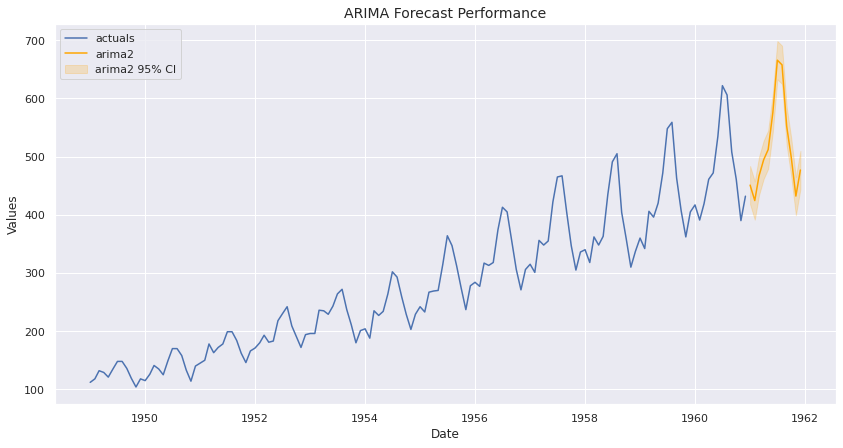

In [13]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [14]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.927
Date:                          Wed, 07 Sep 2022   AIC                           1015.854
Time:                                  20:43:29   BIC                           1033.105
Sample:                                       0   HQIC                          1022.863
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0755      0.276     -0.274      0.784      -0.616       0.465
ma.L1         -0.3550      0.251     -1.416      0.157      -0.846       0.136
ar.S.L12       0.6672      0.155      4.316      0.000       0.364       0.970
ar.S.L24       0.3313      0.098      3.369      0.001       0.139       0.524
ma.S.L12      -0.9738      1.172     -0.831      0.406      -3.271       1.323
sigma2       110.5917    107.947      1.025      0.306    -100.980     322.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.82
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Auto-ARIMA Approach
`pip install pmdarima`

In [15]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=768.937, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=765.723, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=764.756, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=765.328, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=764.138, Time=0.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=764.944, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=766.619, Time=0.11 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=765.206, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=762.550, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=765.329, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=765.510, Time=0.13 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=767.126, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=764.631, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=766.465, Time=0.04 sec
 ARIMA(1,1,2)(0,1,0)[12]         

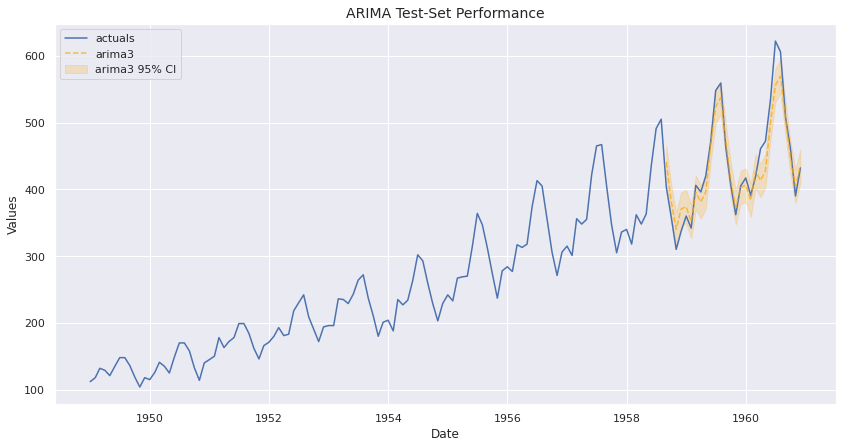

In [16]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

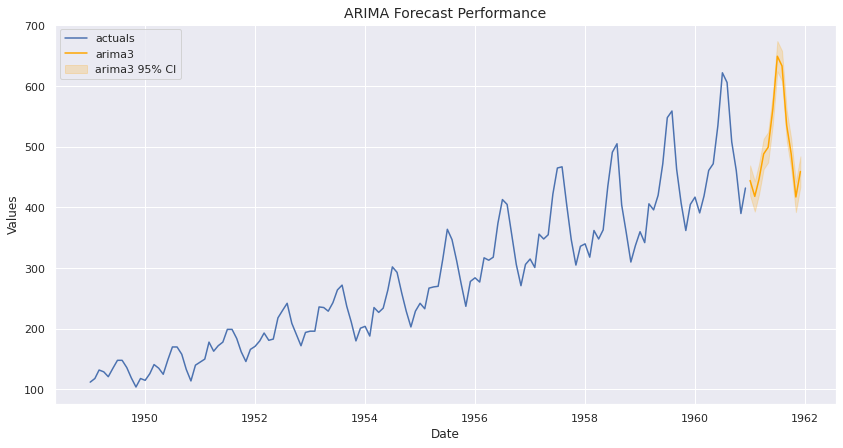

In [17]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [18]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -508.197
Date:                           Wed, 07 Sep 2022   AIC                           1022.393
Time:                                   20:43:31   BIC                           1031.019
Sample:                                        0   HQIC                          1025.898
                                           - 144                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3029      0.355     -0.853      0.393      -0.999       0.393
ma.L1         -0.0052      0.336     -0.016      0.988      -0.663       0.652
sigma2       137.0156     14.653      9.350      0.000     108.295     165.736
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.71
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Grid Search Approach

In [19]:
f.set_validation_length(12)
grid = {
    'order':[
        (1,1,1),
        (1,1,0),
        (0,1,1),
    ],
    'seasonal_order':[
        (2,1,1,12),
        (1,1,1,12),
        (2,1,0,12),
        (0,1,0,12),
    ],
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

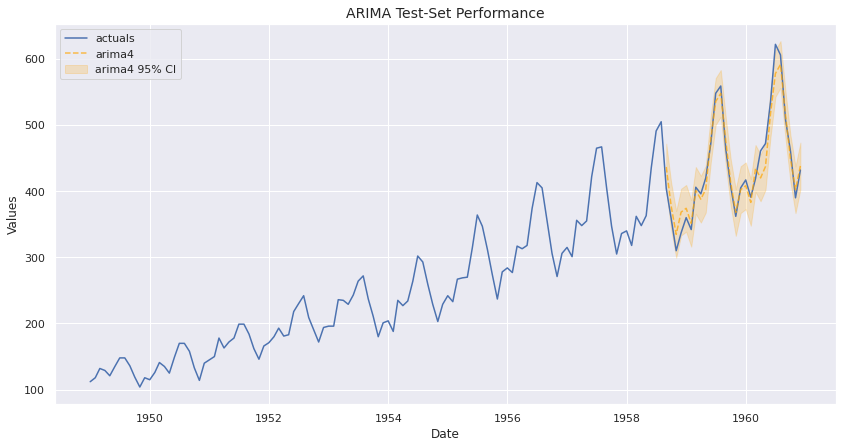

In [20]:
f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

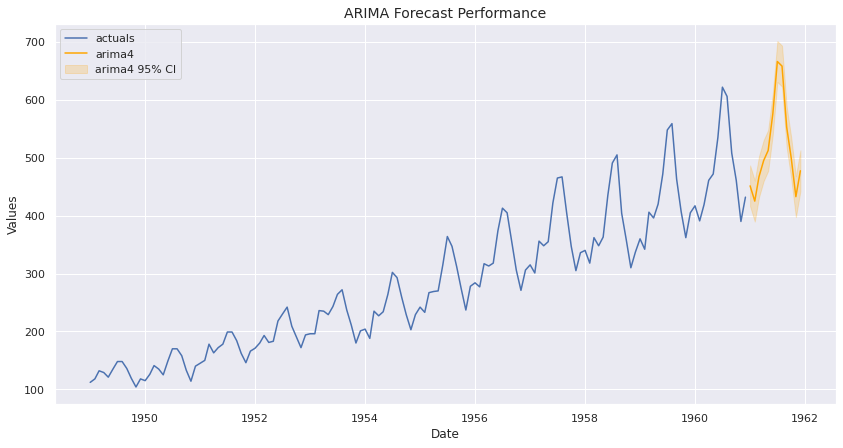

In [21]:
f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [22]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.957
Date:                          Wed, 07 Sep 2022   AIC                           1013.914
Time:                                  20:43:37   BIC                           1028.290
Sample:                                       0   HQIC                          1019.756
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4246      0.068     -6.215      0.000      -0.558      -0.291
ar.S.L12       0.6673      0.153      4.367      0.000       0.368       0.967
ar.S.L24       0.3319      0.094      3.545      0.000       0.148       0.515
ma.S.L12      -0.9811      1.430     -0.686      0.493      -3.785       1.822
sigma2       110.0369    136.796      0.804      0.421    -158.079     378.153
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.60
Prob(Q):                              0.92   Prob(JB):                         0.02
Heteroskedasticity (H):               2.81   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Export Results

In [23]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,excel_name='arima_results.xlsx',determine_best_by='TestSetMAPE')
summaries = results['model_summaries']
summaries[['ModelNickname','HyperParams','InSampleMAPE','TestSetMAPE']]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima4,"{'order': (0, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044538,0.036372
1,arima2,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044445,0.037162
2,arima3,"{'order': (1, 1, 1), 'seasonal_order': (0, 1, 0, 12), 'trend': None}",0.046260,0.045857
3,arima1,{},0.442457,0.430066


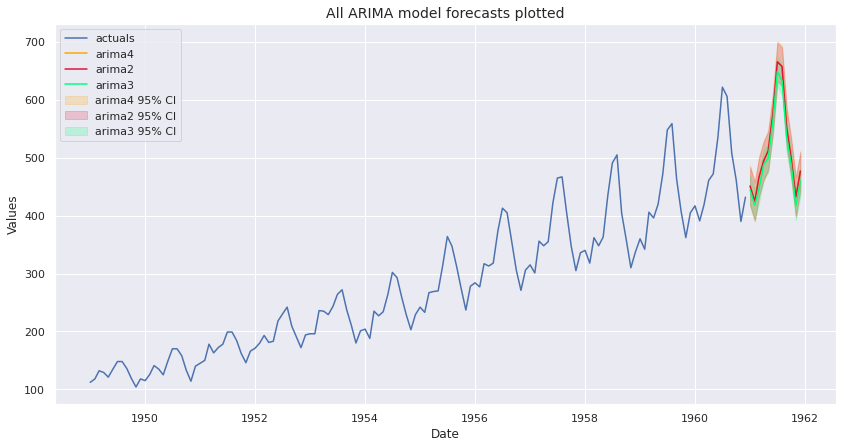

In [24]:
f.plot(ci=True,models=['arima2','arima3','arima4'],order_by='TestSetMAPE')
plt.title('All ARIMA model forecasts plotted',size=14)
plt.show()